In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4990 - accuracy: 0.8247 - val_loss: 0.4448 - val_accuracy: 0.8433
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3767 - accuracy: 0.8642 - val_loss: 0.3888 - val_accuracy: 0.8603
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3390 - accuracy: 0.8768 - val_loss: 0.3724 - val_accuracy: 0.8645
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3133 - accuracy: 0.8863 - val_loss: 0.3785 - val_accuracy: 0.8616
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2949 - accuracy: 0.8921 - val_loss: 0.3496 - val_accuracy: 0.8714
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2804 - accuracy: 0.8960 - val_loss: 0.3348 - val_accuracy: 0.8804
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2683 - accuracy: 0.8998 - val_loss: 0.3425 - val_accuracy: 0.8768
Ep

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


313/313 - 1s - loss: 0.3420 - accuracy: 0.8815 - 928ms/epoch - 3ms/step
Test accuracy: 0.8815000057220459


In [6]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


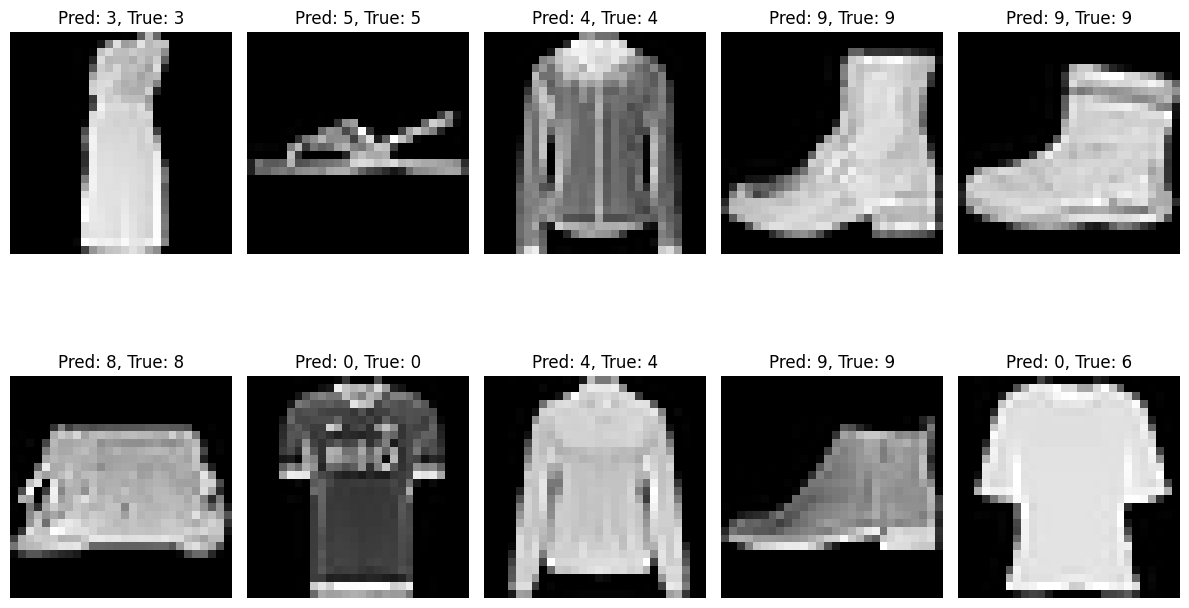

In [7]:
# Select random images from the test dataset
num_images = 10
random_indices = np.random.choice(len(x_test), num_images)

# Plot the original images and their predicted labels
plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    predicted_label = np.argmax(predictions[index])
    true_label = y_test[index]
    plt.title(f'Pred: {predicted_label}, True: {true_label}')

plt.tight_layout()
plt.show()
